# Generate Choice file for all participants (pet experiment)


In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF
# Useful to quickly extract csv files
import glob
import os

In [20]:
# Extract Rate data

In [21]:
# Load data all participants

#choiceNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/*_ChoiceData_PFT_RateChoice_MRI_Exp_*.csv')
#rateNameFrames = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S*_RateData_PFT_RateChoice_MRI_Exp_*.csv')
#rateNameFrames.sort()
#choiceNameFrames.sort()

In [22]:
# Load data participants

select_subj = [1, 3 ,4]

rateNameFrames = list()
choiceNameFrames = list()

for i in np.arange(len(select_subj)):
    choiceNameFrames1 = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S'+str(select_subj[i]).zfill(2)+'/*_ChoiceData_PFT_RateChoice_MRI_Exp_*.csv')
    rateNameFrames1 = glob.glob('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S'+str(select_subj[i]).zfill(2)+'/S*_RateData_PFT_RateChoice_MRI_Exp_*.csv')
    
    rateNameFrames1.sort()
    choiceNameFrames1.sort()
    
    rateNameFrames.extend(rateNameFrames1)
    choiceNameFrames.extend(choiceNameFrames1)


In [23]:
choiceNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_ChoiceData_PFT_RateChoice_MRI_Exp_5.csv',
 '/Users/pradyumna/One

In [24]:
rateNameFrames

['/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_RateData_PFT_RateChoice_MRI_Exp_0.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_RateData_PFT_RateChoice_MRI_Exp_1.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_RateData_PFT_RateChoice_MRI_Exp_2.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_RateData_PFT_RateChoice_MRI_Exp_3.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_RateData_PFT_RateChoice_MRI_Exp_4.csv',
 '/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/Behavioral/S01/S01_RateData_PFT_RateChoice_MRI_Exp_5.csv',
 '/Users/pradyumna/OneDrive - Univ

## Join rating in this case

### ** Only for participant 1 (first scanner pilot) problem in even sessions , the rating appears flipped (1 when it should be 4 and viceversa), should be corrected (5 - originalRating = realRating) .

In [25]:
partic_num=len(rateNameFrames) #number of participants

rateFrameRawAll = pd.DataFrame( )
choiceFrameRawAll = pd.DataFrame( )

for j in range (partic_num):
    rateFrames = pd.read_csv(rateNameFrames[j])
    choiceFrames = pd.read_csv(choiceNameFrames[j]) 
    
   # print (rateFrames.rating)
    
    if 'ratL' in choiceFrames.columns:
        if 'ratR' in choiceFrames.columns:
            choiceFrames = choiceFrames.drop(['ratL', 'ratR'], axis=1)
   
    partNamesRate = [int(os.path.basename(choiceNameFrames[j])[1:3])]*len(rateFrames)
    partNamesChoice = [int(os.path.basename(rateNameFrames[j])[1:3])]*len(choiceFrames)

    sessionRate = [int(os.path.basename(choiceNameFrames[j])[-5])]*len(rateFrames)
    sessionChoice = [int(os.path.basename(rateNameFrames[j])[-5])]*len(choiceFrames)

    
    rateFrames['part'] = partNamesRate 
    choiceFrames['part'] = partNamesChoice 

    rateFrames['session'] = sessionRate 
    choiceFrames['session'] = sessionChoice 

    
    # to fix rating in wrong participant
    if np.unique(partNamesRate) == 1 and np.unique(sessionRate)[0]%2 == 1: # participant 1 is the conflictive one.
        ratingFixed = 5 - rateFrames.rating.values
        rateFrames['rating'] = [-1 if x==6 else x for x in ratingFixed]
        print('into')

        
 #   print (rateFrames.rating)

        
    choiceFrameRawAll = pd.concat([choiceFrameRawAll,choiceFrames],ignore_index=True)
    rateFrameRawAll = pd.concat([rateFrameRawAll,rateFrames],ignore_index=True)

into
into
into


In [26]:
choiceFrameRawAll

,trial,trialOnset,leftId,rightId,frame,trialOnsetTim,trialSnd1Tim,trialSnd2Tim,trialThinkTime,trialRespTime,trialEnd,choice,choiceTime,primerSound,part,session
0,0.0,143.077966,2.0,1.0,1.0,0.009619,1.023621,1.523994,3.503366,3.503595,10.008441,1.0,6.590348,2.0,1,0
1,1.0,153.087441,1.0,2.0,2.0,0.009057,1.032679,1.532957,3.502486,3.502708,11.009513,-1.0,4.171487,1.0,1,0
2,2.0,164.098005,1.0,2.0,2.0,0.009079,1.022719,1.523898,3.501520,3.501757,10.006834,1.0,3.852746,2.0,1,0
3,3.0,174.106030,5.0,1.0,2.0,0.009285,1.033354,1.534430,3.502239,3.502460,12.009805,-1.0,3.769766,1.0,1,0
4,4.0,192.637473,1.0,5.0,1.0,0.009233,1.034660,1.535800,3.503632,3.503843,10.008921,-1.0,3.788469,1.0,1,0
5,5.0,202.647474,2.0,6.0,1.0,0.009394,1.028146,1.529312,3.502148,3.502394,12.013349,1.0,4.054466,2.0,1,0
6,6.0,219.678266,2.0,1.0,2.0,0.008916,1.032876,1.533299,3.502200,3.502425,11.001328,-1.0,3.787507,1.0,1,0
7,7.0,241.213399,2.0,5.0,2.0,0.009753,1.033124,1.534266,3.503173,3.503389,10.008696,1.0,4.355867,2.0,1,0
8,8.0,264.267688,6.0,5.0,2.0,0.010293,1.032259,1.533323,3.501530,3.501765,11.008697,1.0,3.836901,2.0,1,0
9,9.0,275.277436,6.0,2.0,1.0,0.008549,1.023823,1.524562,3.501752,3.501993,12.008782,-1.0,5.671837,1.0,1,0


In [27]:
rateFrameRawAll

,Unnamed: 0,trial,trialOnset,picId,picNum,frame,rating,trialImageOnst,trialRateOnst,trialRatEnd,trialEnd,part,session
0,0,1.0,59.305129,2.0,0.0,1.0,2.0,0.518071,5.604951,7.623053,11.526767,1,0
1,1,2.0,70.833333,5.0,5.0,1.0,-1.0,0.566282,-1.000000,-1.000000,7.521732,1,0
2,2,3.0,78.356332,2.0,7.0,1.0,-1.0,0.571069,-1.000000,-1.000000,5.520130,1,0
3,3,4.0,83.877670,2.0,3.0,1.0,-1.0,0.600012,-1.000000,-1.000000,5.519645,1,0
4,4,5.0,89.398398,6.0,7.0,2.0,-1.0,0.563814,-1.000000,-1.000000,6.521725,1,0
5,5,6.0,95.921410,6.0,2.0,1.0,-1.0,0.557425,-1.000000,-1.000000,6.526225,1,0
6,6,7.0,102.448775,2.0,2.0,2.0,-1.0,0.561463,-1.000000,-1.000000,5.530800,1,0
7,7,8.0,107.980686,2.0,6.0,1.0,-1.0,0.599863,-1.000000,-1.000000,6.521363,1,0
8,8,9.0,114.503353,1.0,4.0,2.0,-1.0,0.567268,-1.000000,-1.000000,7.522701,1,0
9,9,10.0,122.027292,2.0,0.0,2.0,1.0,0.582623,3.602454,6.254604,9.523372,1,0


In [28]:
data_expL = rateFrameRawAll.loc[(rateFrameRawAll['frame'] == 1)] # 1 = Like, 2 = Dislike

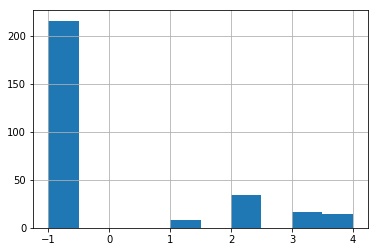

In [29]:
data_expL.rating.hist()

In [30]:
choiceFrameAll = pd.DataFrame( columns = ['trial','leftId','rightId','frame','endTime','choice','choiceTime','LRat1','RRat1','LRat2','RRat2','LVar1','RVar1','LVar2','RVar2','Part'])
idFrameAll = pd.DataFrame( columns = ['nameId','rat1','rat2','var1','var2','Part'])

In [31]:
for j in list (choiceFrameRawAll.part.unique()):
    
    idNames = list(rateFrameRawAll.picId.unique())
    IdRatings1 = [None]*len(idNames)
    IdRatings2 = [None]*len(idNames)
    IdRatingsVar1 = [None]*len(idNames)
    IdRatingsVar2 = [None]*len(idNames)
    IdRatingsAll1 = [None]*len(idNames)
    IdRatingsAll2 = [None]*len(idNames)

    #extract average rating for like, dislike
    for i in range(len(idNames)):
        IdRatings1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()
        IdRatings2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.mean()
        #print(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating)
        IdRatingsVar1[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()
        IdRatingsVar2[i] = rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.std()

        IdRatingsAll1[i] = np.array(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 1) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.values)
        IdRatingsAll2[i] = np.array(rateFrameRawAll.loc[(rateFrameRawAll['picId'] == idNames[i]) & (rateFrameRawAll['frame'] == 2) & (rateFrameRawAll['part'] == j) & (rateFrameRawAll['rating'] >= 0)].rating.values)
    
        
    rateValues = pd.DataFrame( {'nameId': idNames,'rat1': IdRatings1,'rat2': IdRatings2,'var1': IdRatingsVar1,'var2': IdRatingsVar2,'AllRatings1':IdRatingsAll1,'AllRatings2':IdRatingsAll2})
    rateValues['Part'] = [j]*len(rateValues)    
    
    # save information about celebs and ratings
    
    idFrameAll = pd.concat([idFrameAll,rateValues],ignore_index=True)
    
    choiceFrames = choiceFrameRawAll.loc[ (choiceFrameRawAll['part'] == j)]
    
    # separate ratings and rating-variability for each frame
    ChoiceLRat1 = [None]*len(choiceFrames)
    ChoiceRRat1 = [None]*len(choiceFrames)
    ChoiceLRat2 = [None]*len(choiceFrames)
    ChoiceRRat2 = [None]*len(choiceFrames)

    ChoiceLVar1 = [None]*len(choiceFrames)
    ChoiceRVar1 = [None]*len(choiceFrames)
    ChoiceLVar2 = [None]*len(choiceFrames)
    ChoiceRVar2 = [None]*len(choiceFrames)
    
    for i in range(len(choiceFrames)):
        
        choiceL = choiceFrames.iloc[i].leftId
        choiceR = choiceFrames.iloc[i].rightId
        
        if any((rateValues['nameId'] == choiceL)) and any((rateValues['nameId'] == choiceR)):
        
            ChoiceLRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat1.values[0]
            ChoiceRRat1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat1.values[0]
            ChoiceLRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].rat2.values[0]
            ChoiceRRat2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].rat2.values[0]
            
            ChoiceLVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var1.values[0]
            ChoiceRVar1[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var1.values[0]
            ChoiceLVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceL)].var2.values[0]
            ChoiceRVar2[i] = rateValues.loc[(rateValues['nameId'] == choiceR)].var2.values[0]

    choiceFrames['LRat1'] = ChoiceLRat1
    choiceFrames['RRat1'] = ChoiceRRat1
    choiceFrames['LRat2'] = ChoiceLRat2
    choiceFrames['RRat2'] = ChoiceRRat2 
    
    choiceFrames['LVar1'] = ChoiceLVar1
    choiceFrames['RVar1'] = ChoiceRVar1
    choiceFrames['LVar2'] = ChoiceLVar2
    choiceFrames['RVar2'] = ChoiceRVar2
     
    choiceFrames['Part'] = [j]*len(choiceFrames)    

    choiceFrameAll = pd.concat([choiceFrameAll,choiceFrames],ignore_index=True)
    

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [32]:
idFrameAll.AllRatings1[1][1]


2.0

In [33]:
choiceFrameAll

,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,choice,...,rightId,session,trial,trialEnd,trialOnset,trialOnsetTim,trialRespTime,trialSnd1Tim,trialSnd2Tim,trialThinkTime
0,2.500000,2.333333,0.836660,0.816497,1,3.333333,1.666667,0.816497,0.816497,1.0,...,1.0,0.0,0.0,10.008441,143.077966,0.009619,3.503595,1.023621,1.523994,3.503366
1,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,-1.0,...,2.0,0.0,1.0,11.009513,153.087441,0.009057,3.502708,1.032679,1.532957,3.502486
2,3.333333,1.666667,0.816497,0.816497,1,2.500000,2.333333,0.836660,0.816497,1.0,...,2.0,0.0,2.0,10.006834,164.098005,0.009079,3.501757,1.022719,1.523898,3.501520
3,2.000000,2.500000,0.000000,0.547723,1,3.333333,1.666667,0.816497,0.816497,-1.0,...,1.0,0.0,3.0,12.009805,174.106030,0.009285,3.502460,1.033354,1.534430,3.502239
4,3.333333,1.666667,0.816497,0.816497,1,2.000000,2.500000,0.000000,0.547723,-1.0,...,5.0,0.0,4.0,10.008921,192.637473,0.009233,3.503843,1.034660,1.535800,3.503632
5,2.500000,2.333333,0.836660,0.816497,1,2.166667,2.500000,0.752773,0.836660,1.0,...,6.0,0.0,5.0,12.013349,202.647474,0.009394,3.502394,1.028146,1.529312,3.502148
6,2.500000,2.333333,0.836660,0.816497,1,3.333333,1.666667,0.816497,0.816497,-1.0,...,1.0,0.0,6.0,11.001328,219.678266,0.008916,3.502425,1.032876,1.533299,3.502200
7,2.500000,2.333333,0.836660,0.816497,1,2.000000,2.500000,0.000000,0.547723,1.0,...,5.0,0.0,7.0,10.008696,241.213399,0.009753,3.503389,1.033124,1.534266,3.503173
8,2.166667,2.500000,0.752773,0.836660,1,2.000000,2.500000,0.000000,0.547723,1.0,...,5.0,0.0,8.0,11.008697,264.267688,0.010293,3.501765,1.032259,1.533323,3.501530
9,2.166667,2.500000,0.752773,0.836660,1,2.500000,2.333333,0.836660,0.816497,-1.0,...,2.0,0.0,9.0,12.008782,275.277436,0.008549,3.501993,1.023823,1.524562,3.501752


# Save file

In [34]:
idFrameAll

,AllRatings1,AllRatings2,Part,nameId,rat1,rat2,var1,var2
0,"[2.0, 2.0, 2.0, 4.0, 2.0, 3.0]","[1.0, 3.0, 3.0, 2.0, 3.0, 2.0]",1,2.0,2.500000,2.333333,0.836660,0.816497
1,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0]","[2.0, 2.0, 3.0, 3.0, 2.0, 3.0]",1,5.0,2.000000,2.500000,0.000000,0.547723
2,"[2.0, 2.0, 2.0, 3.0, 1.0, 3.0]","[3.0, 2.0, 2.0, 2.0, 4.0, 2.0]",1,6.0,2.166667,2.500000,0.752773,0.836660
3,"[3.0, 4.0, 3.0, 2.0, 4.0, 4.0]","[1.0, 1.0, 3.0, 2.0, 1.0, 2.0]",1,1.0,3.333333,1.666667,0.816497,0.816497
4,"[3.0, 2.0, 3.0, 2.0, 2.0, 2.0]","[3.0, 2.0, 2.0, 3.0, 3.0, 3.0]",3,2.0,2.333333,2.666667,0.516398,0.516398
5,"[1.0, 1.0, 2.0, 2.0, 1.0, 2.0]","[2.0, 3.0, 2.0, 2.0, 3.0, 4.0]",3,5.0,1.500000,2.666667,0.547723,0.816497
6,"[2.0, 2.0, 2.0, 2.0, 1.0, 1.0]","[2.0, 2.0, 3.0, 3.0, 4.0, 3.0]",3,6.0,1.666667,2.833333,0.516398,0.752773
7,"[4.0, 3.0, 4.0, 2.0, 3.0, 4.0]","[2.0, 1.0, 1.0, 3.0, 2.0, 2.0]",3,1.0,3.333333,1.833333,0.816497,0.752773
8,"[4.0, 3.0, 3.0, 3.0, 4.0, 3.0]","[2.0, 2.0, 3.0, 3.0, 2.0, 3.0]",4,2.0,3.333333,2.500000,0.516398,0.547723
9,"[2.0, 3.0, 2.0, 2.0, 3.0, 2.0]","[2.0, 3.0, 2.0, 3.0, 2.0, 2.0]",4,5.0,2.333333,2.333333,0.516398,0.516398


In [35]:
choiceFrameAll.loc[(choiceFrameAll['Part'] == 3)]

,LRat1,LRat2,LVar1,LVar2,Part,RRat1,RRat2,RVar1,RVar2,choice,...,rightId,session,trial,trialEnd,trialOnset,trialOnsetTim,trialRespTime,trialSnd1Tim,trialSnd2Tim,trialThinkTime
144,1.666667,2.833333,0.516398,0.752773,3,2.333333,2.666667,0.516398,0.516398,1.0,...,2.0,0.0,0.0,10.013129,122.379519,0.008605,3.507591,1.020741,1.521760,3.507088
145,1.500000,2.666667,0.547723,0.816497,3,1.666667,2.833333,0.516398,0.752773,1.0,...,6.0,0.0,1.0,11.006220,132.529415,0.010511,3.515657,1.030361,1.531569,3.515307
146,1.666667,2.833333,0.516398,0.752773,3,2.333333,2.666667,0.516398,0.516398,1.0,...,2.0,0.0,2.0,12.000181,144.129619,0.006901,3.509187,1.023841,1.525057,3.508854
147,1.500000,2.666667,0.547723,0.816497,3,1.666667,2.833333,0.516398,0.752773,-1.0,...,6.0,0.0,3.0,12.010674,157.180464,0.006823,3.502245,1.034679,1.535908,3.501897
148,1.500000,2.666667,0.547723,0.816497,3,2.333333,2.666667,0.516398,0.516398,1.0,...,2.0,0.0,4.0,10.001466,187.631265,0.007589,3.511215,1.038964,1.540185,3.510868
149,1.666667,2.833333,0.516398,0.752773,3,3.333333,1.833333,0.816497,0.752773,-1.0,...,1.0,0.0,5.0,10.009919,197.781366,0.007228,3.504151,1.035491,1.536166,3.503705
150,1.500000,2.666667,0.547723,0.816497,3,2.333333,2.666667,0.516398,0.516398,-1.0,...,2.0,0.0,6.0,10.001733,212.938596,0.006912,3.510373,1.024092,1.525351,3.510023
151,1.666667,2.833333,0.516398,0.752773,3,3.333333,1.833333,0.816497,0.752773,1.0,...,1.0,0.0,7.0,10.005940,252.883446,0.007138,3.516123,1.026983,1.527822,3.515772
152,1.666667,2.833333,0.516398,0.752773,3,2.333333,2.666667,0.516398,0.516398,-1.0,...,2.0,0.0,8.0,10.003783,290.584396,0.007242,3.515061,1.029417,1.530323,3.514709
153,3.333333,1.833333,0.816497,0.752773,3,1.500000,2.666667,0.547723,0.816497,1.0,...,5.0,0.0,9.0,11.008006,334.085507,0.007195,3.501660,1.032670,1.533854,3.501311


In [36]:
choiceFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_Choice_ScanPilot_All_134.csv',index = False)
idFrameAll.to_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_idRatingsFrame_ScanPilot_All_134.csv',index = False)

## -- [end ] 